In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Test GTEx

In [2]:
## loading GTEx data
p,x,n_full,cate_name = load_GTEx_full(verbose=True)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,n_sample=n_full,verbose=True)

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,n_sample=n_full,lamb=0.995,verbose=True)

## Load GTEx full data ##
# all hypothesis: 10623893
# filtered hypothesis: 169301
# p=0.00226011, x=[13.73583078  0.08957559  0.112      16.        ]
# p=0.00254028, x=[13.74614226  0.08957559  0.         16.        ]
# p=0.000610689, x=[13.74784609  0.08957559  0.         16.        ]
# p=0.00071358, x=[1.37478546e+01 8.95755866e-02 1.20000000e-02 1.60000000e+01]
# p=0.000228687, x=[13.74820448  0.08957559  0.209      13.        ]


## bh testing summary ##
# n_rej = 29348
# t_rej = 0.000276


## sbh summary ##
# n_rej = 29689
# t_rej = 0.000286
# pi_0 estimate = 0.975




## PrimFDR_init starts
# Learning null distribution
Slope: w=0.9317270316123487, a=[ 0.83999512 -0.13649902 -0.13649902]
Bump 0: w=0.0077308435691977205, mu=[0.47018693 0.83382955 0.68909007], sigma=[0.20234287 0.06770849 0.11958469]
Bump 1: w=0.017085995477853826, mu=[0.87278407 0.56295691 0.24008723], sigma=[0.04701514 0.21971315 0.10310371]
Bump 2: w=0.006465413175309146, mu=[0.36695207 0.1897114  0.43013387], sigma=[0.08166024 0.07479772 0.16514118]
Bump 3: w=0.013993832109958942, mu=[0.5390608  0.85156195 0.30772631], sigma=[0.21698236 0.06659598 0.11167146]
Bump 4: w=0.022996884055331658, mu=[0.86461229 0.58126991 0.67616374], sigma=[0.05508333 0.20766787 0.14278404]


# Learning alternative distribution
Slope: w=0.924192489624567, a=[-1.2108252   0.15646973  0.15646973]
Bump 0: w=0.017071668997078175, mu=[0.38577436 0.5801807  0.72196332], sigma=[0.14716836 0.07802683 0.12486511]
Bump 1: w=0.01871522511081465, mu=[0.3149561  0.63575345 0.37622714], sigma=[0.1395254  0.06662047 0

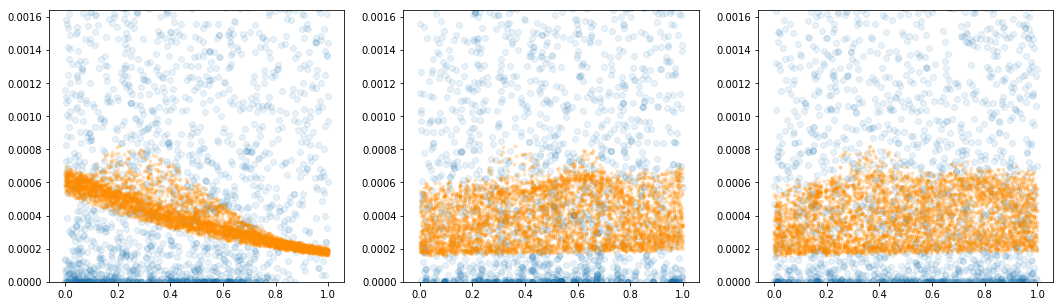

## PrimFDR_init finishes

gamma1 0.23830286982543342
0 1.0000000000000004 117488 51813 0.44100674111398613
0 0.5000000000000002 117488 51813 0.44100674111398613
0 0.2500000000000001 117488 51813 0.44100674111398613
0 0.12500000000000006 117488 51813 0.44100674111398613
0 0.06250000000000003 113817 48358 0.4248750186703217
0 0.031250000000000014 87657 29931 0.3414559019815873
0 0.015625000000000007 60580 14850 0.2451304060746121
0 0.007812500000000003 44557 7431 0.16677514195300402
0 0.003906250000000002 34143 3611 0.10576106376123949
0 0.001953125000000001 26831 1814 0.06760836346017667
0.0009765625000000004 0.001953125000000001 30536 2741 0.08976290280324863
0.0014648437500000007 0.001953125000000001 32341 3158 0.09764694969234099
0.0017089843750000009 0.001953125000000001 33270 3386 0.10177336940186354
0.0017089843750000009 0.0018310546875000009 32843 3265 0.09941235575312853
0.0017700195312500009 0.0018310546875000009 33040 3328 0.10072639225181598
0.0017700195312500009 0.0018005371

In [ ]:
n_rej,t,_=PrimFDR(p,x[:,0:3],5,alpha=0.1,h=None,n_itr=5000,verbose=True)

In [ ]:
_=PrimFDR_cv(p,x[:,0:3],5,alpha=0.1,n_itr=10000,h=None,verbose=True)